# Dataset - train/test/val split

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append('../')

import numpy as np
import pandas as pd

from src.data import train_test_split, MRISequence

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.cmap'] = 'viridis'

%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [3]:
from collections import Counter


def get_data(image_dir, class_names):
    seq = MRISequence(image_dir, 32, input_shape=(112, 112, 105, 1), images=False)
    cls = np.concatenate(np.array([np.argmax(y, axis=1) for x, y in seq]))
    return pd.DataFrame(np.array(list(map(lambda i: class_names[i], cls))), columns=['class'])


def report(df):
    count = len(df)
    counter = Counter(df['class'])

    print(f'total: {count}')
    for cls in class_names:
        print(f'{cls}: {counter[cls] / count} ({counter[cls]})')

    return sns.countplot(x='class', data=df, order=class_names)


def weights(df):
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#class_weights
    counter = Counter(df['class'])

    AD = counter['AD']
    CN = counter['CN']

    # Scaling by total / 2 helps keep the loss to a similar magnitude.
    # The sum of the weights of all examples stays the same.
    weight_for_ad = (1 / AD) * (AD + CN) / 2.0 
    weight_for_cn = (1 / CN) * (AD + CN) / 2.0

    print(f'WEIGHTS | AD: {weight_for_ad} CN: {weight_for_cn}')

## Split #1

Split train: 0.8, test: 0.15, val: 0.05

In [4]:
# class_names = ('CN', 'AD')


# train_dir, test_dir, val_dir = train_test_split(
#     '../tmp/saliencies_and_segmentations_v2',
#     '../tmp',
#     class_names=class_names,
#     split=(0.8, 0.15, 0.05),
#     dirname='data-v2'
# )

In [5]:
# df = get_data(train_dir, class_names)

# report(df)
# weights(df)

In [6]:
# df = get_data(test_dir, class_names)

# report(df)

In [7]:
# df = get_data(val_dir, class_names)

# report(df)

## Split #2

Split train: 0.8, test: 0.2

In [8]:
class_names = ('CN', 'AD')


train_dir, test_dir, val_dir = train_test_split(
    '../tmp/saliencies_and_segmentations_v2',
    '../tmp',
    class_names=class_names,
    split=(0.8, 0.2, 0),
    dirname='data-v3',
    seed=42
)

  0%|          | 0/502 [00:00<?, ?it/s]

copying to ../tmp\data-v3...

copying files...


100%|██████████| 502/502 [05:21<00:00,  1.56it/s]


total: 402
CN: 0.6194029850746269 (249)
AD: 0.3805970149253731 (153)
WEIGHTS | AD: 1.3137254901960784 CN: 0.8072289156626505


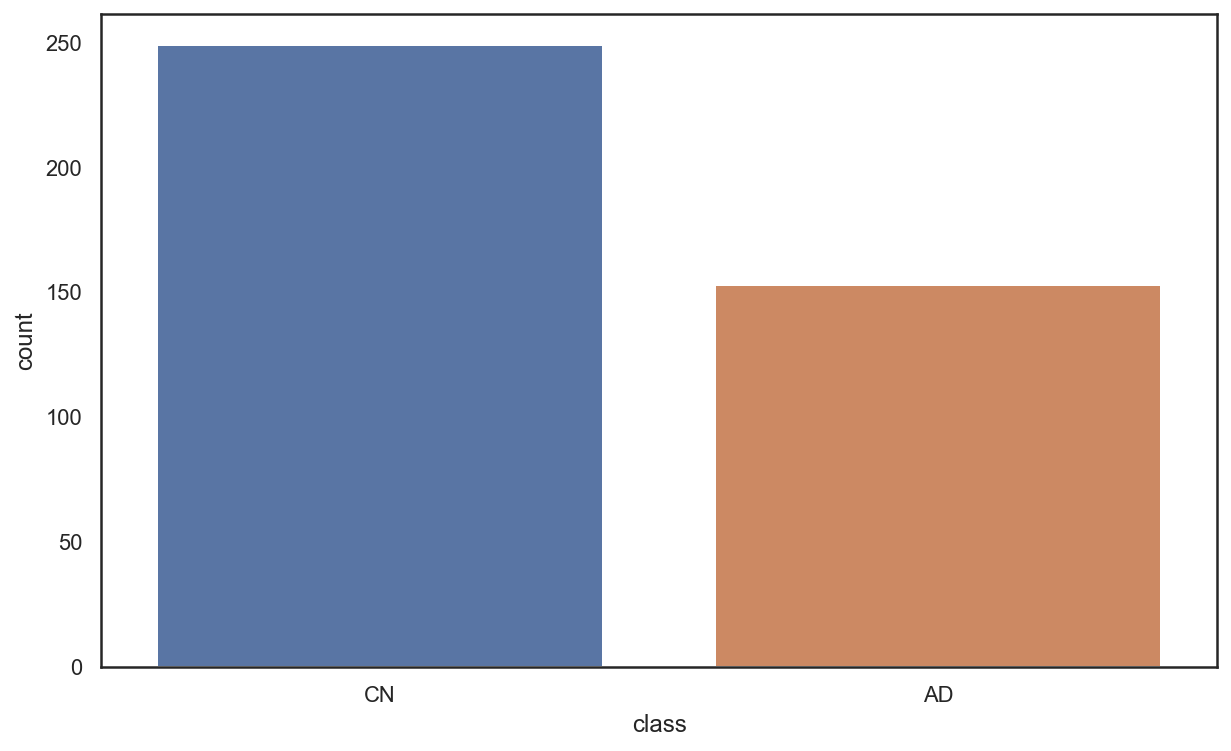

In [9]:
df = get_data(train_dir, class_names)

report(df)
weights(df)

total: 100
CN: 0.62 (62)
AD: 0.38 (38)


<AxesSubplot:xlabel='class', ylabel='count'>

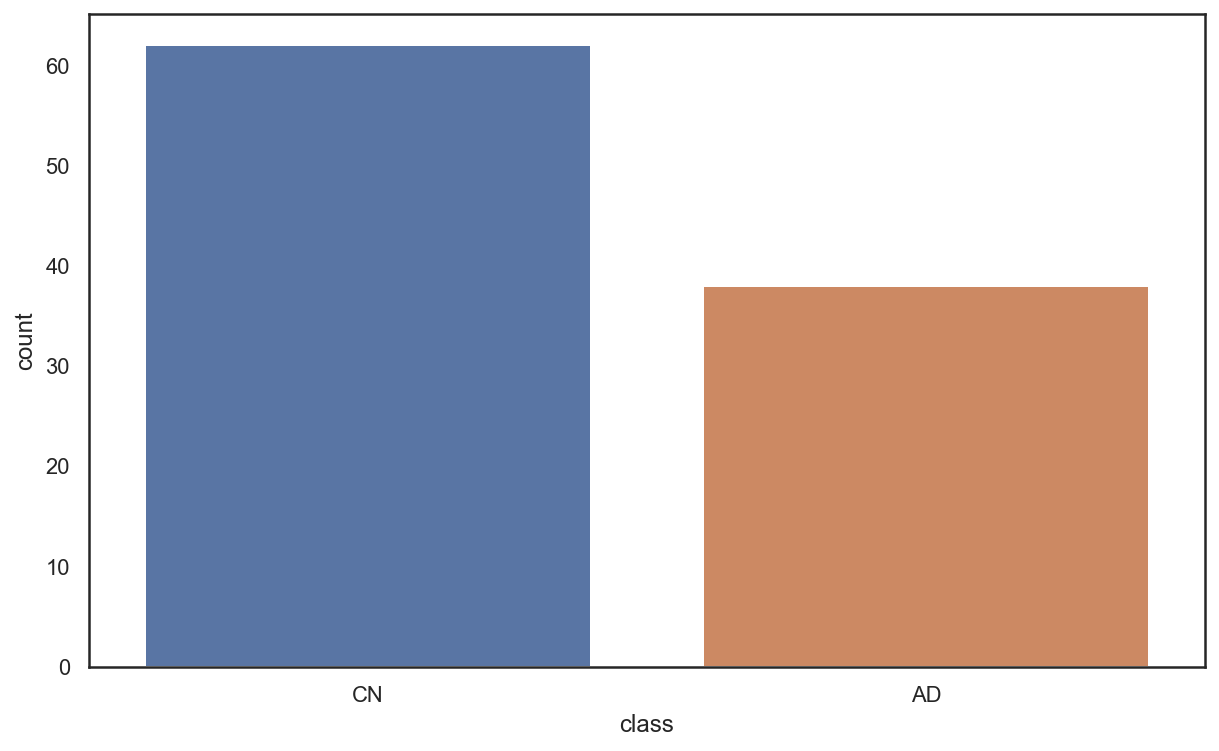

In [10]:
df = get_data(test_dir, class_names)

report(df)